In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.core.display import HTML
from IPython.core.display import Image
from datetime import datetime

from scipy import stats as ss
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML
from IPython.core.display import Image





In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; } </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
jupyter_settings()

def cramer_v(x, y):
    cm = pd.crosstab(x,y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / (min(kcorr - 1, rcorr - 1)))


pd.set_option('display.float_format', lambda x: '%.5f' % x)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('datasets/kc_house_data.csv')

# Data Description

In order to better understand the data it is good practice to conduct a basic data description. This way we can ensure we have a better overview of the information the  data is providing. Performing an Exploratory Data Analysis allows for an easier understanding of possible relationship between the different attributes.

In [4]:
print(f'Dataframe Rows: {data.shape[0]}')
print(f'Dataframe Columns: {data.shape[1]}')

Dataframe Rows: 21613
Dataframe Columns: 21


In [5]:
print(data.columns)

data.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


## Changing Data Types

In [9]:
data['date'] = pd.to_datetime(data['date'])

## Describing data

In [10]:
num_attributes = data[['price', 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
cat_attributes = data[['date','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]

### Numerical Attributes

In [11]:
# Central Tendency
ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply(np.median)).T

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( np.std)).T
d2 = pd.DataFrame( num_attributes.apply( np.min)).T
d3 = pd.DataFrame( num_attributes.apply( np.max)).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

# bringing all together
m = pd.concat ( [d2, d3,d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min','max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.00000,7700000.00000,7625000.00000,540088.14177,450000.00000,367118.70318,4.02407,34.58554
1,sqft_living,290.00000,13540.00000,13250.00000,2079.89974,1910.00000,918.41965,1.47156,5.24309
2,sqft_lot,520.00000,1651359.00000,1650839.00000,15106.96757,7618.00000,41419.55327,13.06002,285.07782
3,sqft_above,290.00000,9410.00000,9120.00000,1788.39069,1560.00000,828.07182,1.44666,3.40230
4,sqft_basement,0.00000,4820.00000,4820.00000,291.50905,0.00000,442.56480,1.57797,2.71557
5,sqft_living15,399.00000,6210.00000,5811.00000,1986.55249,1840.00000,685.37545,1.10818,1.59710
6,sqft_lot15,651.00000,871200.00000,870549.00000,12768.45565,7620.00000,27303.54796,9.50674,150.76311


Text(0.5, 1.0, 'sqft_basement')

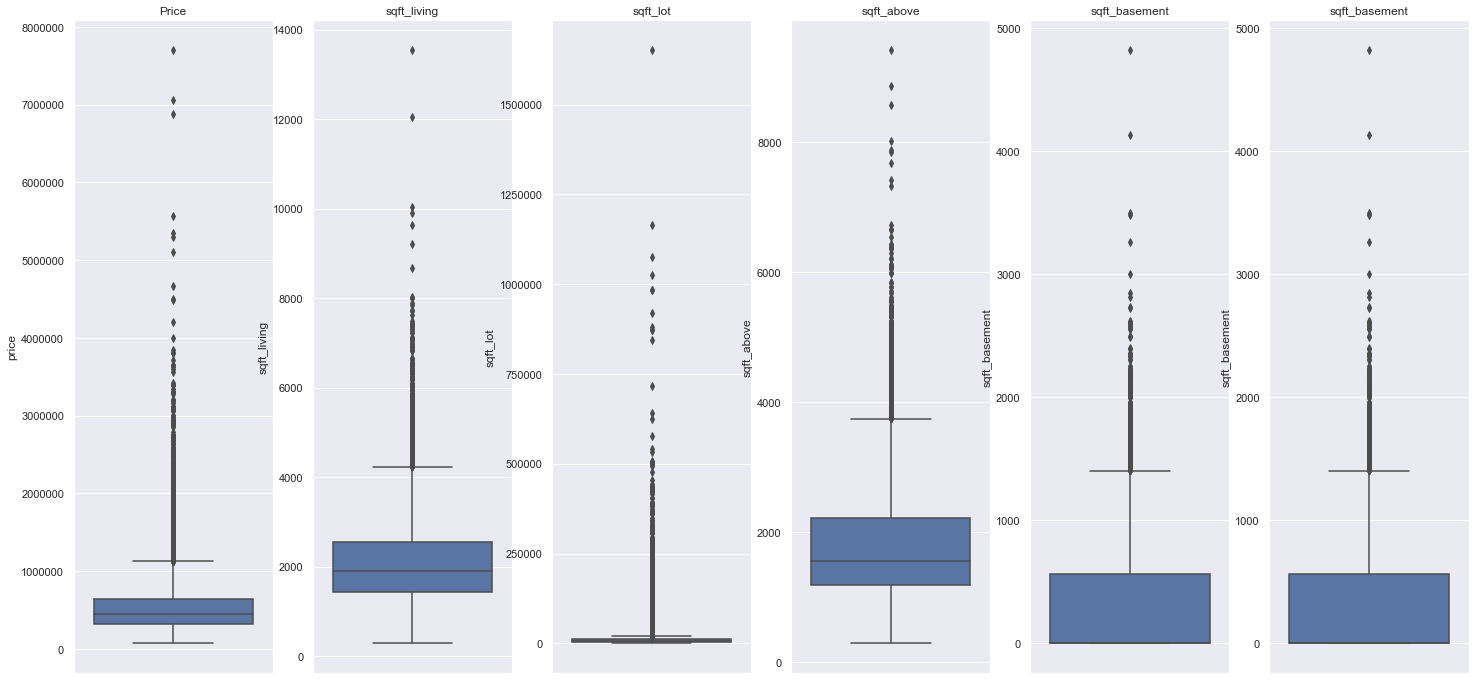

In [12]:
plt.subplot(1,6,1)
sns.boxplot( y = 'price' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Price')

plt.subplot(1,6,2)
sns.boxplot( y = 'sqft_living' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_living')

plt.subplot(1,6,3)
sns.boxplot( y = 'sqft_lot' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_lot')

plt.subplot(1,6,4)
sns.boxplot( y = 'sqft_above' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_above')

plt.subplot(1,6,5)
sns.boxplot( y = 'sqft_basement' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_basement')

plt.subplot(1,6,6)
sns.boxplot( y = 'sqft_basement' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_basement')


### Categories

In [13]:
cat_attributes.shape

(21613, 15)

In [14]:
cat_attributes.apply(lambda x: x.unique().shape[0])

date              372
bedrooms           13
bathrooms          30
floors              6
waterfront          2
view                5
condition           5
grade              12
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

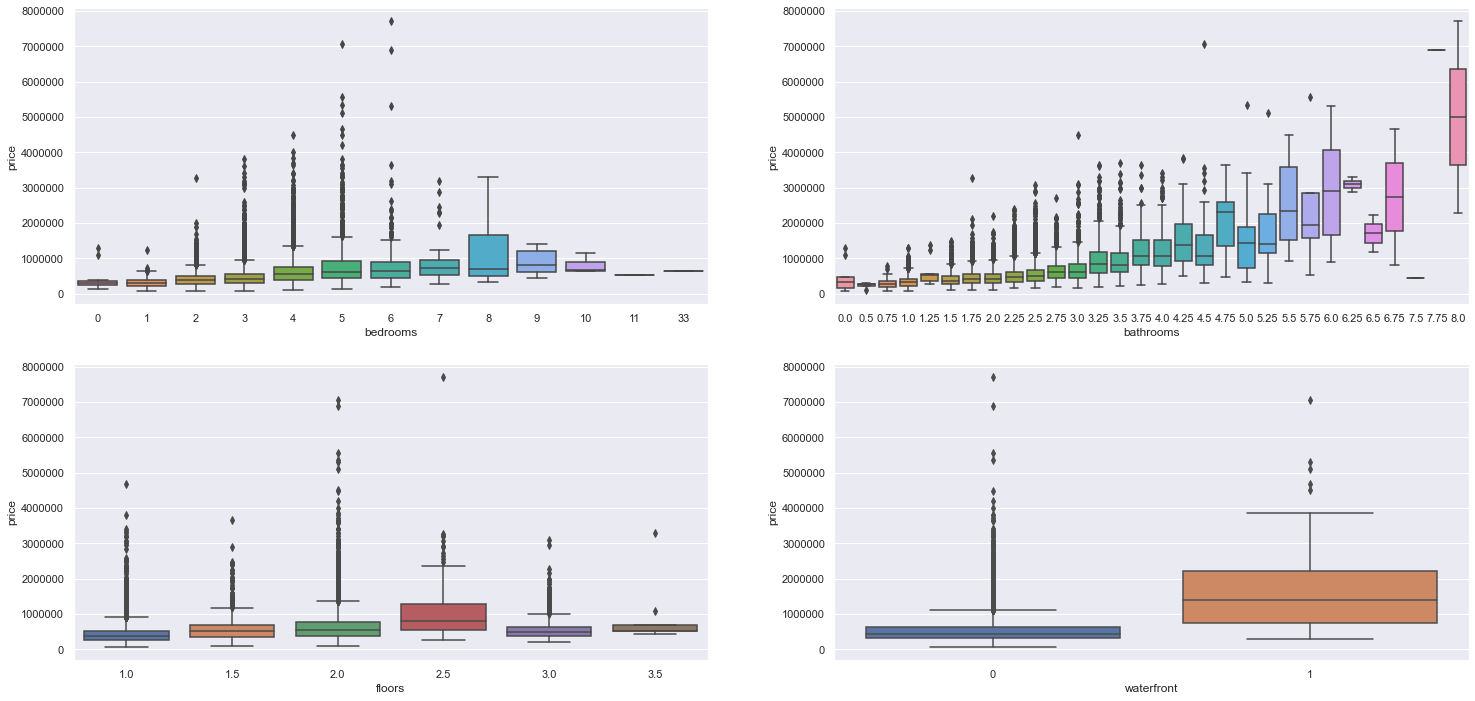

In [15]:
plt.subplot(2,2,1)
sns.boxplot( x = 'bedrooms', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,2)
sns.boxplot( x = 'bathrooms', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,3)
sns.boxplot( x = 'floors', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,4)
sns.boxplot( x = 'waterfront', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')






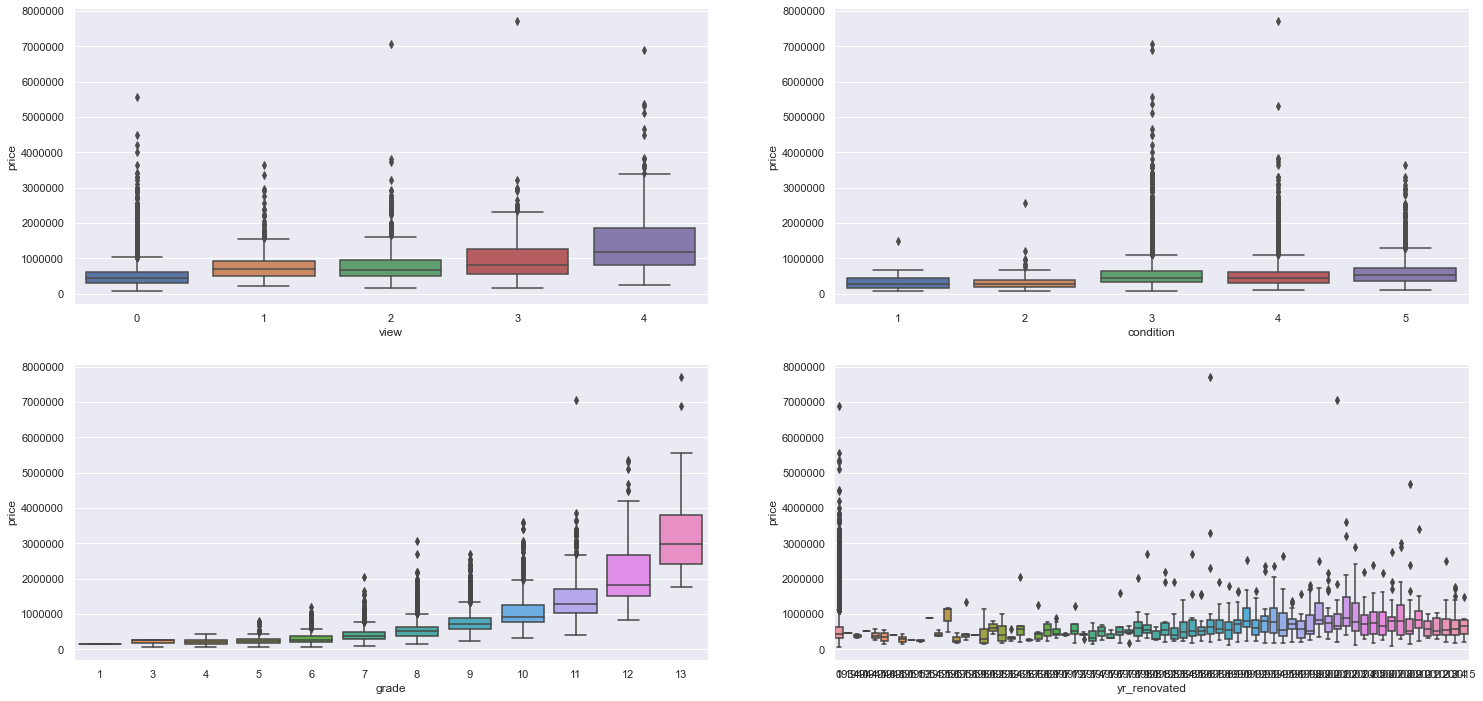

In [16]:
plt.subplot(2,2,1)
sns.boxplot( x = 'view', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,2)
sns.boxplot( x = 'condition', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,3)
sns.boxplot( x = 'grade', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,4)
sns.boxplot( x = 'yr_renovated', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')

In [17]:
# aux_data_pivot = data[['lat','long','price']].reset_index()
# data_pivot = pd.pivot_table(aux_data_pivot, index = 'lat', columns = 'long', values = 'price', aggfunc='mean')
# # df.pivot_table(index='team', columns='position', values='points', aggfunc='sum')
# sns.heatmap(data_pivot)

The dataset contains many outliers, since it is not being done any machine learning training at the moment they will be left in the dataset.

# Filters

In [18]:
# House with 33 bedrooms inside a 6000 sqft lot, with 1 floor - does not look right - drop it.
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.00000,33,1.75000,1620,6000,1.00000,0,0,5,7,1040,580,1947,0,98103,47.68780,-122.33100,1330,4700


In [19]:
data.drop(data.index[15870], inplace = True)

# Features and Scope

In [20]:
# sqft price 
data['aux_sqft_living_price'] = data['price'] / data['sqft_living']


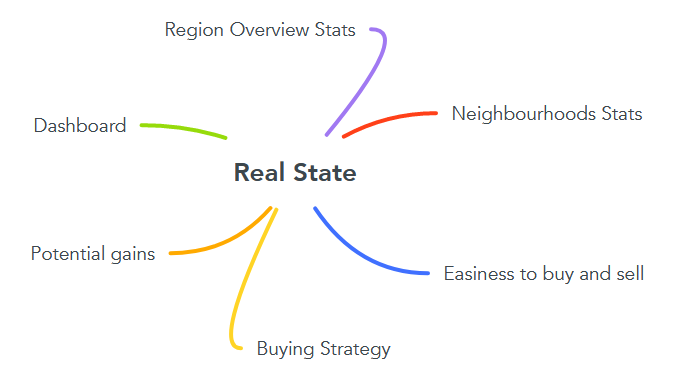

In [21]:
# Hypothesis
Image('./MindMap.png')

# Exploring Data

## Univariate

### Response Variable

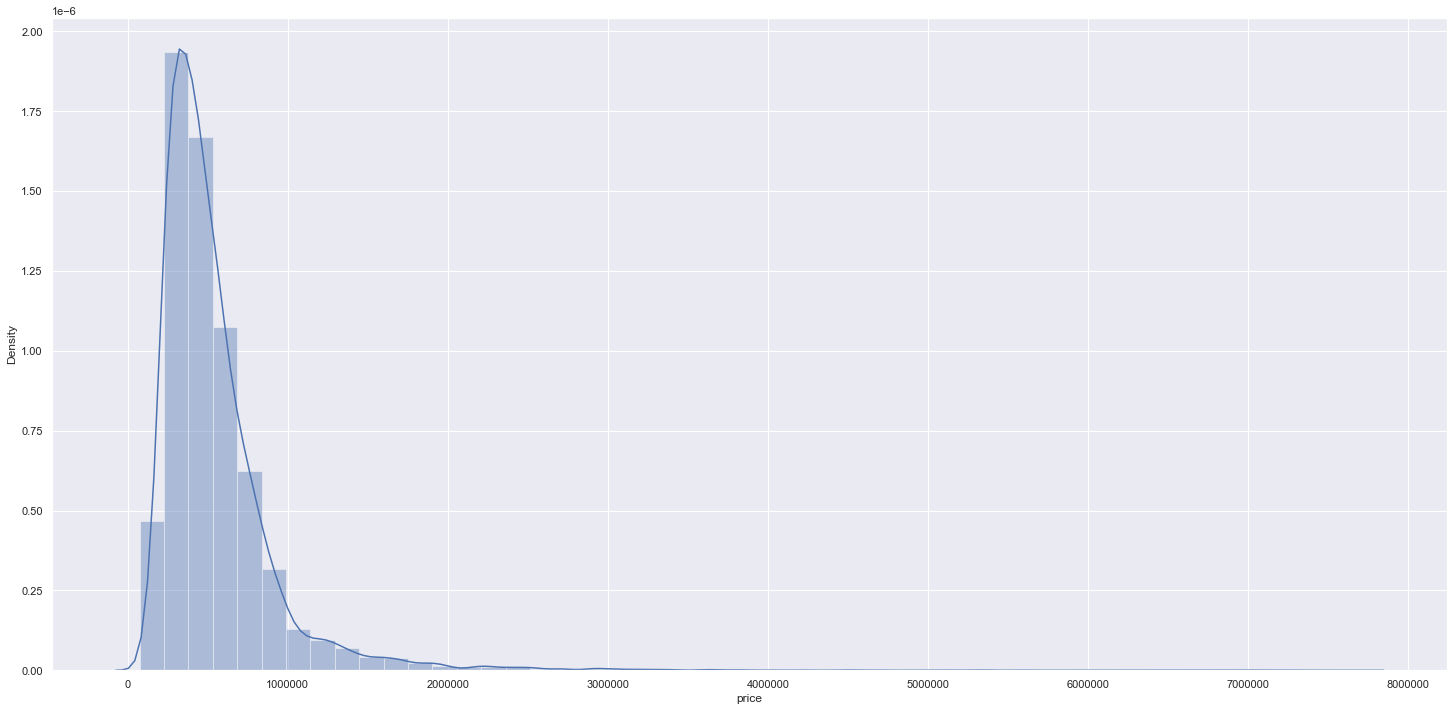

In [22]:
sns.distplot(data.price)
plt.ticklabel_format(style='plain', axis='x')

### Numerical variables

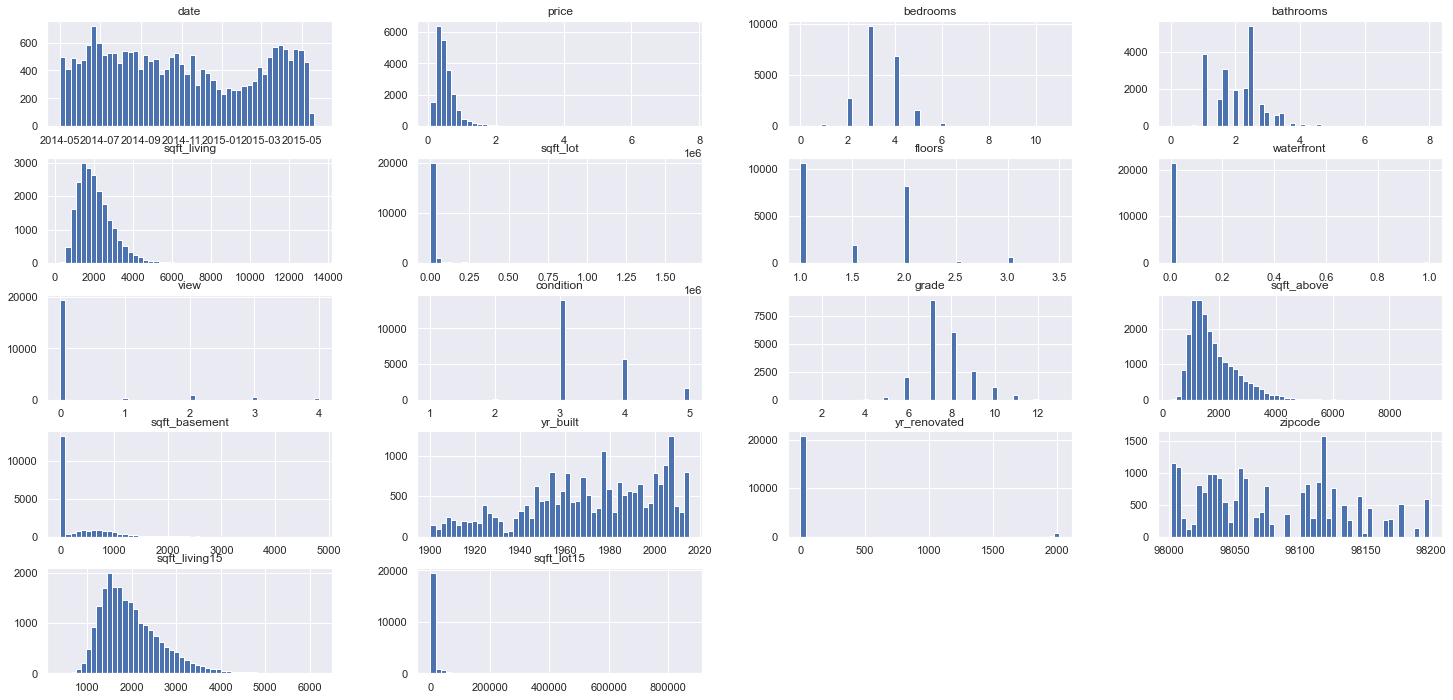

In [23]:
# Data overview
aux_hist = data[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']]
aux_hist.hist(bins = 50);

### Categorical Attributes

In [24]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'aux_sqft_living_price'],
      dtype='object')

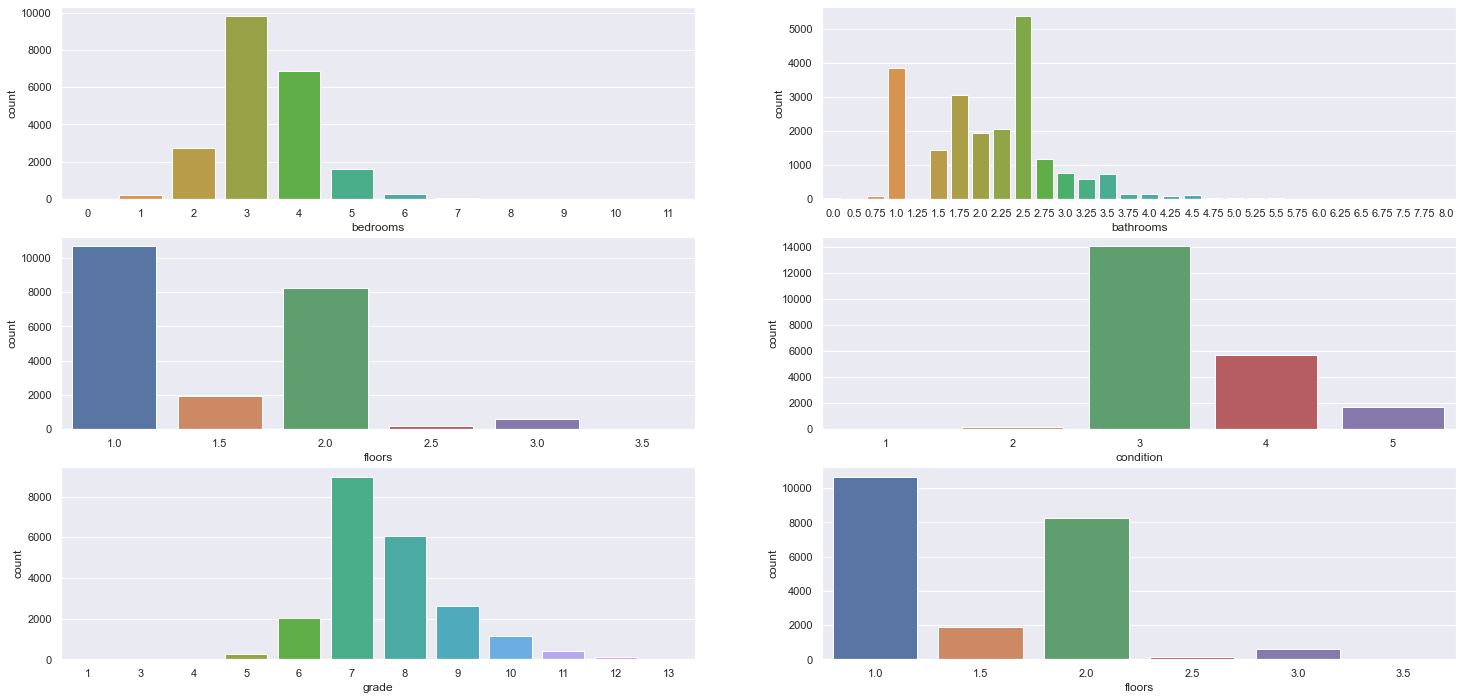

In [25]:
plt.subplot(3, 2, 1);
sns.countplot(data['bedrooms']);
plt.subplot(3, 2, 2);
sns.countplot(data['bathrooms']);
plt.subplot(3, 2, 3);
sns.countplot(data['floors']);
plt.subplot(3, 2, 4);
sns.countplot(data['condition']);
plt.subplot(3, 2, 5);
sns.countplot(data['grade']);
plt.subplot(3, 2, 6);
sns.countplot(data['floors']);

## Bivariate

### The square foot of newer houses are more expensive

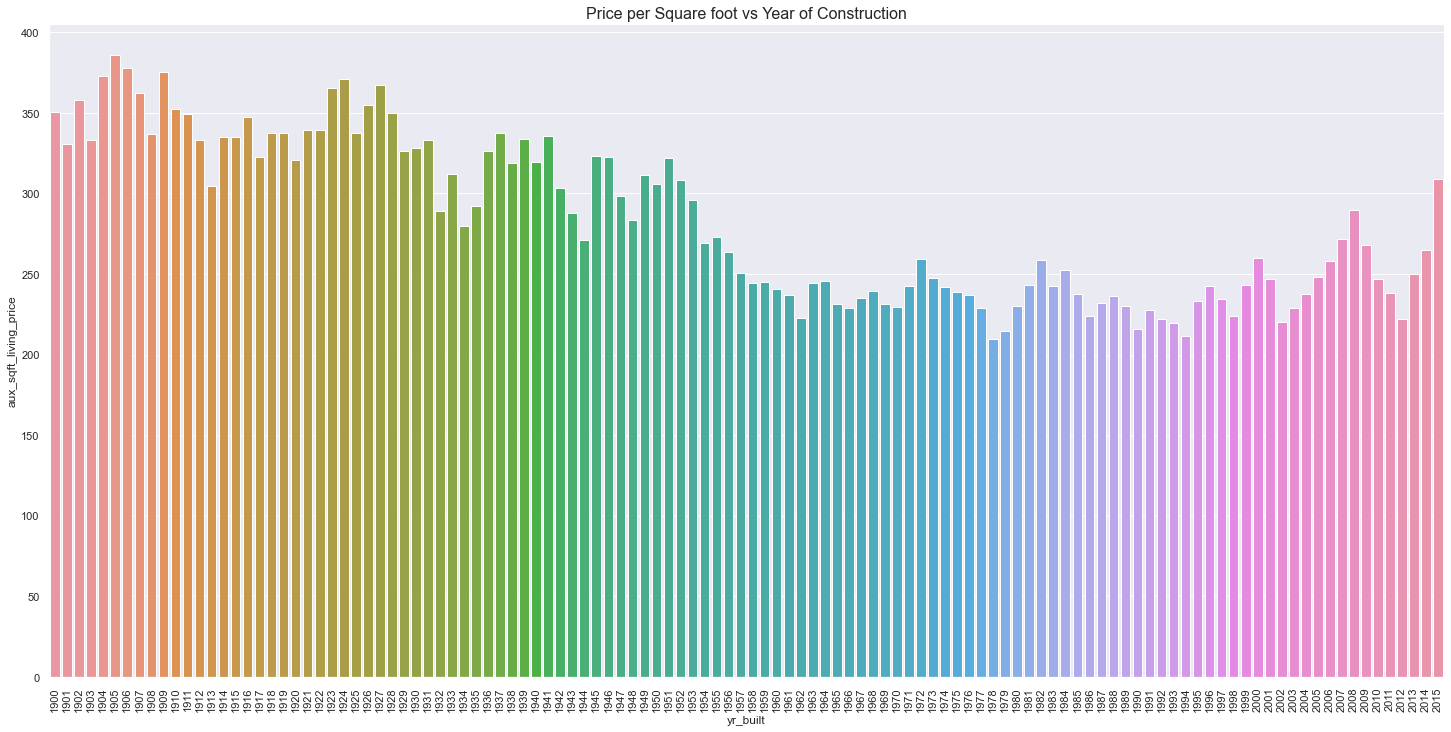

In [26]:
# The square foot of newer houses are more expensive.

data[['price','yr_built']]

sns.barplot( x = 'yr_built', y = 'aux_sqft_living_price', data= data, ci=None )
plt.xticks(rotation = 90);
plt.title('Price per Square foot vs Year of Construction', fontsize = 16);

# Not true, they tend to be cheaper. The graph shows that properties that was a decline in price in the 50s and it has been kept from 60s onwards.

### Cheaper properties are easier to resell:

Q1: 321837.5
Median: 540083.5187858597
Q3: 645000.0


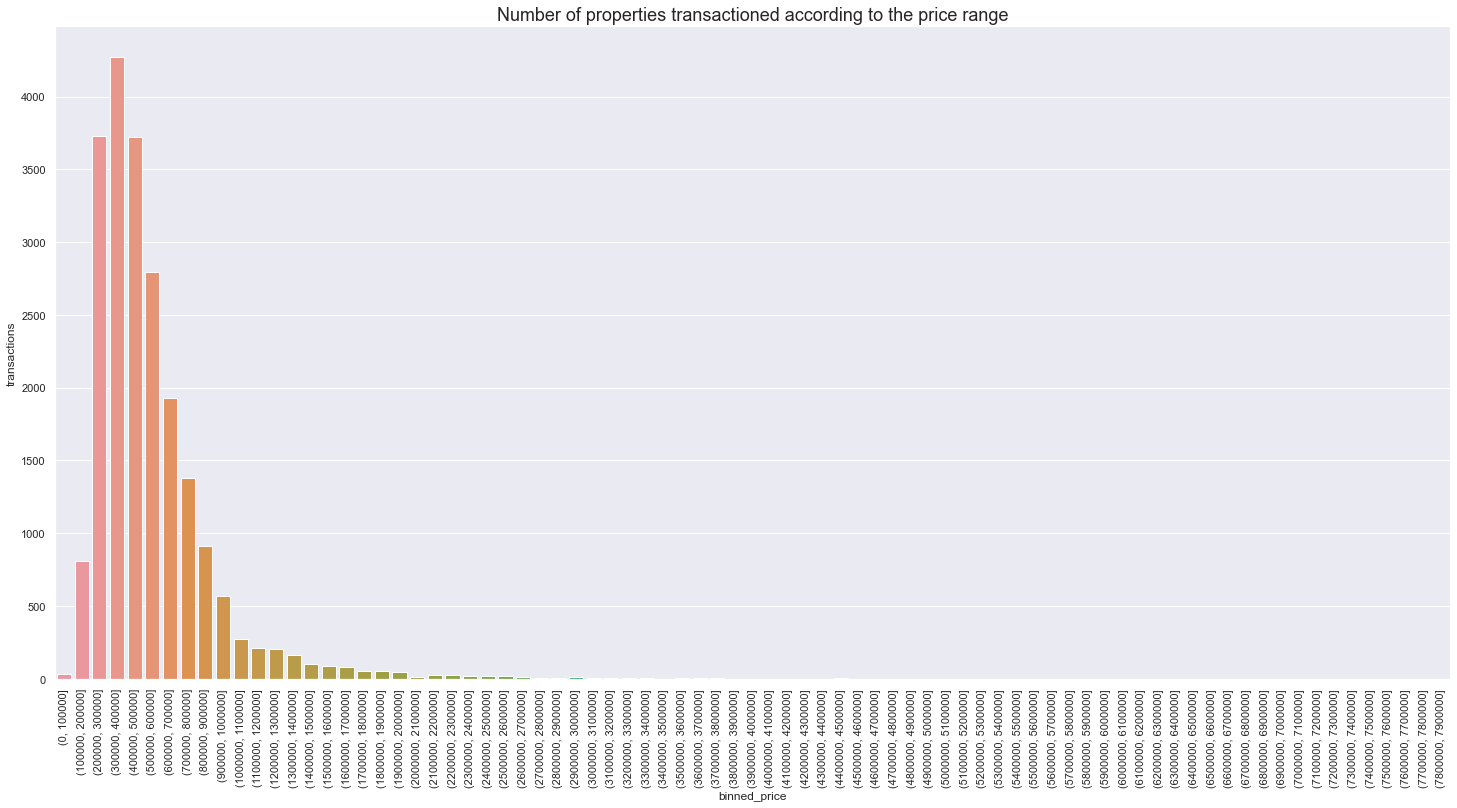

In [27]:
# Cheaper properties are easier to resell.

print('Q1: ' + str(data.price.quantile(.25)))
print('Median: ' + str(data.price.mean()))
print('Q3: ' + str(data.price.quantile(.75)))

bins = list(range(0,8000000,100000))
data['binned_price'] = pd.cut(data['price'], bins=bins)

data.head(20)

bin_price_number_transactions = data[['price','binned_price']].groupby('binned_price').count().reset_index()
bin_price_number_transactions.rename(columns = {'price':'transactions'}, inplace = True)

sns.barplot(x = 'binned_price', y = 'transactions', data=bin_price_number_transactions)
plt.xticks(rotation = 90);
plt.title('Number of properties transactioned according to the price range', fontsize = 18);



# It is true, the properties that sell the most are the ones between 300.000 and 400.000 dollars. Moreover the properties between 200.000 and 600.000 account for over 67% of the transactions.

In [28]:

transactions_by_binned_price = data[['binned_price', 'id']].groupby('binned_price').count().reset_index()

transactions_by_binned_price

tot_transactions = transactions_by_binned_price.id.sum()

transactions_by_binned_price['pct'] = transactions_by_binned_price['id'] / tot_transactions * 100
transactions_by_binned_price

labels = ['Up to 200.000', '200.000 to 600.000', '600.000 to 800.000' , 'Over 800.000']
sizes = [transactions_by_binned_price.loc[0:1]['pct'].sum(), transactions_by_binned_price.loc[2:5]['pct'].sum(), 
         transactions_by_binned_price.loc[6:7]['pct'].sum(), transactions_by_binned_price.loc[8:]['pct'].sum()]
# explode = (0, 0.1, 0, 0)
# sizes
# plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90);
for a,b in zip(labels, sizes):
         print(f'{a}  :{str(b)}')

Up to 200.000  :3.8913566537109014
200.000 to 600.000  :67.1663890431242
600.000 to 800.000  :15.315565426614844
Over 800.000  :13.626688876550064


### The larger the property(living area) the cheaper the square foot.

In [29]:
print(data['sqft_living'].max())
print(data['sqft_living'].min())

13540
290


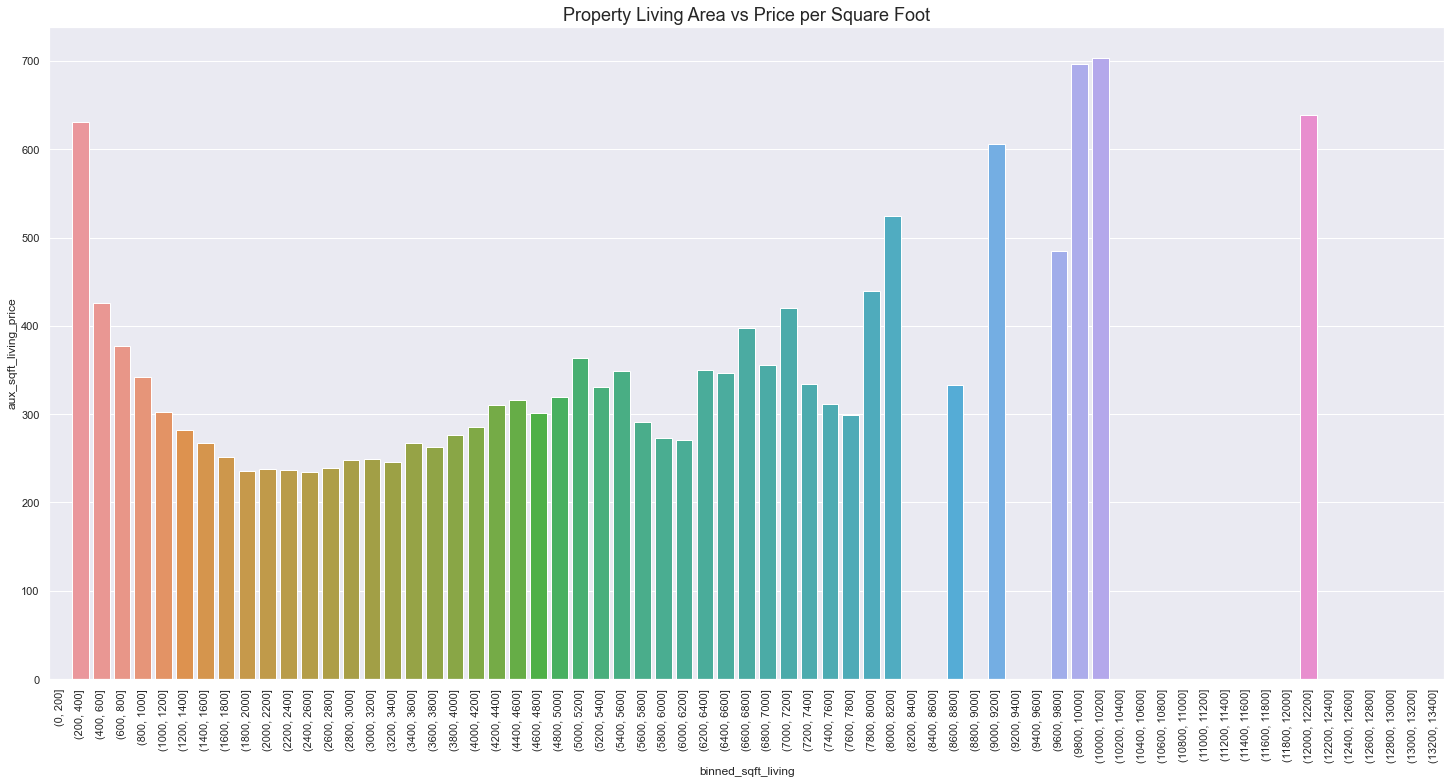

In [30]:
# The larger the property(living area) the cheaper the square foot.

# Average Square foot price according to living size
data.columns

# price_per_sqft_vs_living_size = data[['sqft_living','']]
bins = list(range(0,13600,200))
data['binned_sqft_living'] = pd.cut(data['sqft_living'], bins=bins)

sns.barplot( x = 'binned_sqft_living', y = 'aux_sqft_living_price', data = data, ci = False)
plt.title('Property Living Area vs Price per Square Foot', fontsize = 18);
plt.xticks(rotation = 90);
# data.head()

# That would be true in relative terms. If considered the properties only with a size up to 2.500 sqft, beyond that values will get higher. So the statement must be rejected.

### The larger the property + lot size, the cheaper the square foot

In [31]:
data['living_and_lot'] = data['sqft_living'] + data['sqft_lot']
print(data['living_and_lot'].max())
print(data['living_and_lot'].min())

1652659
1423


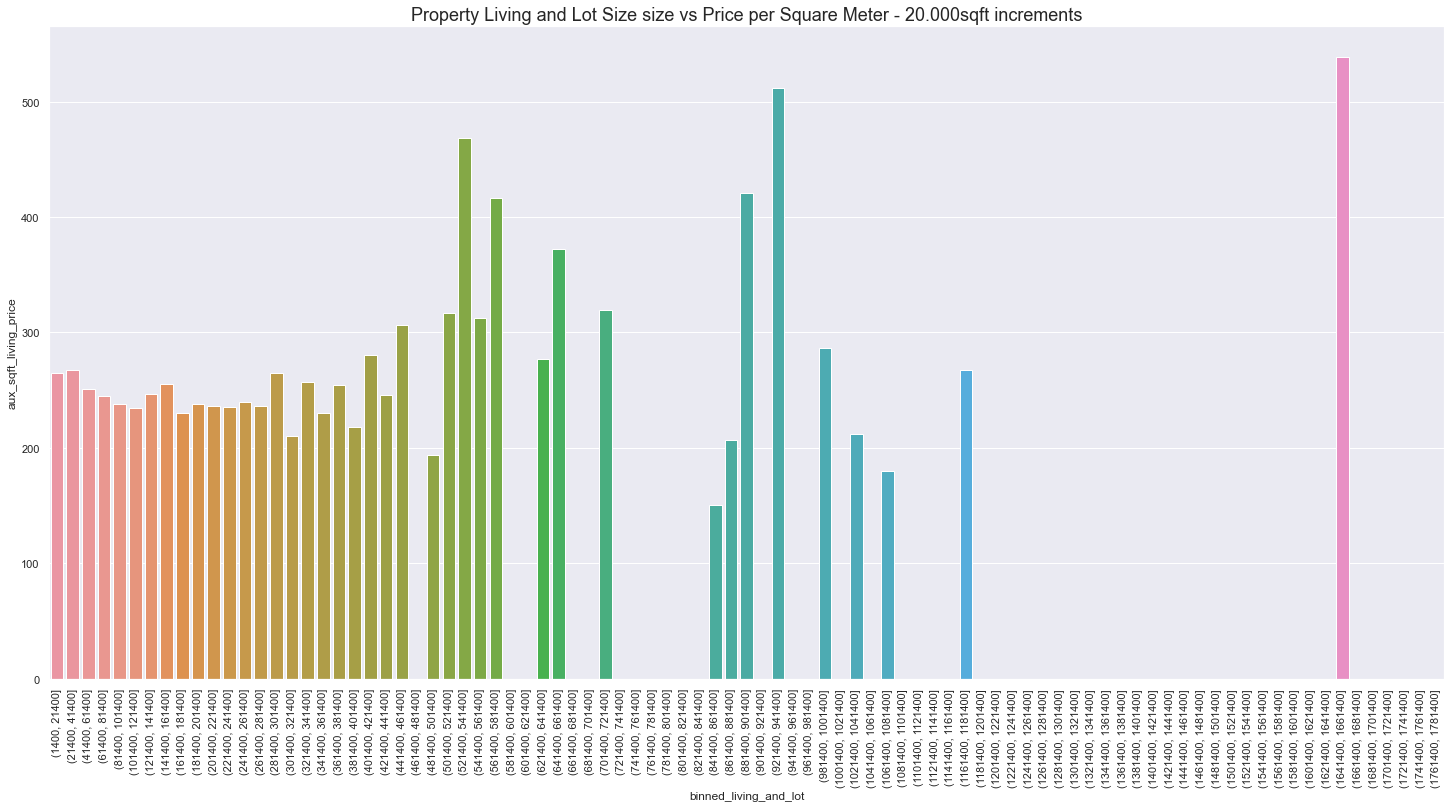

In [32]:
# The larger the property + lot size, the cheaper the square foot

# plt.subplot(1,2,1)
# sns.regplot(x = 'living_and_lot', y = 'aux_sqft_living_price', data = data)
# plt.ticklabel_format(style='plain', axis='x')
# plt.subplot(1,2,2)
# aux_corr = data[['living_and_lot','aux_sqft_living_price']]
# sns.heatmap(aux_corr.corr(method = 'pearson'), annot = True)


bins = list(range(1400,1800000,20000))
data['binned_living_and_lot'] = pd.cut(data['living_and_lot'], bins=bins)

data.head(20)

bin_price_number_transactions = data[['price','binned_living_and_lot']].groupby('binned_living_and_lot').mean().reset_index()
bin_price_number_transactions.rename(columns = {'price':'price_binned_living_and_lot'}, inplace = True)

sns.barplot( x = 'binned_living_and_lot', y = 'aux_sqft_living_price', data = data, ci = False)
plt.xticks(rotation = 90);
plt.title('Property Living and Lot Size size vs Price per Square Meter - 20.000sqft increments',fontsize = 18);

# To answer this the dataset has been sliced in 20.000 sqft increaments for the computated area, according to the graph and the presence of outliers this hypothesis has become unconclusive. So can´t be validated using the whole of the dataset.


### During certain quarters of the year prices are higher

2014-05-02 00:00:00
2015-05-27 00:00:00
  quarter  aux_sqft_living_price
0      Q1              263.37714
1      Q2              270.84767
2      Q3              259.72305
3      Q4              258.62888


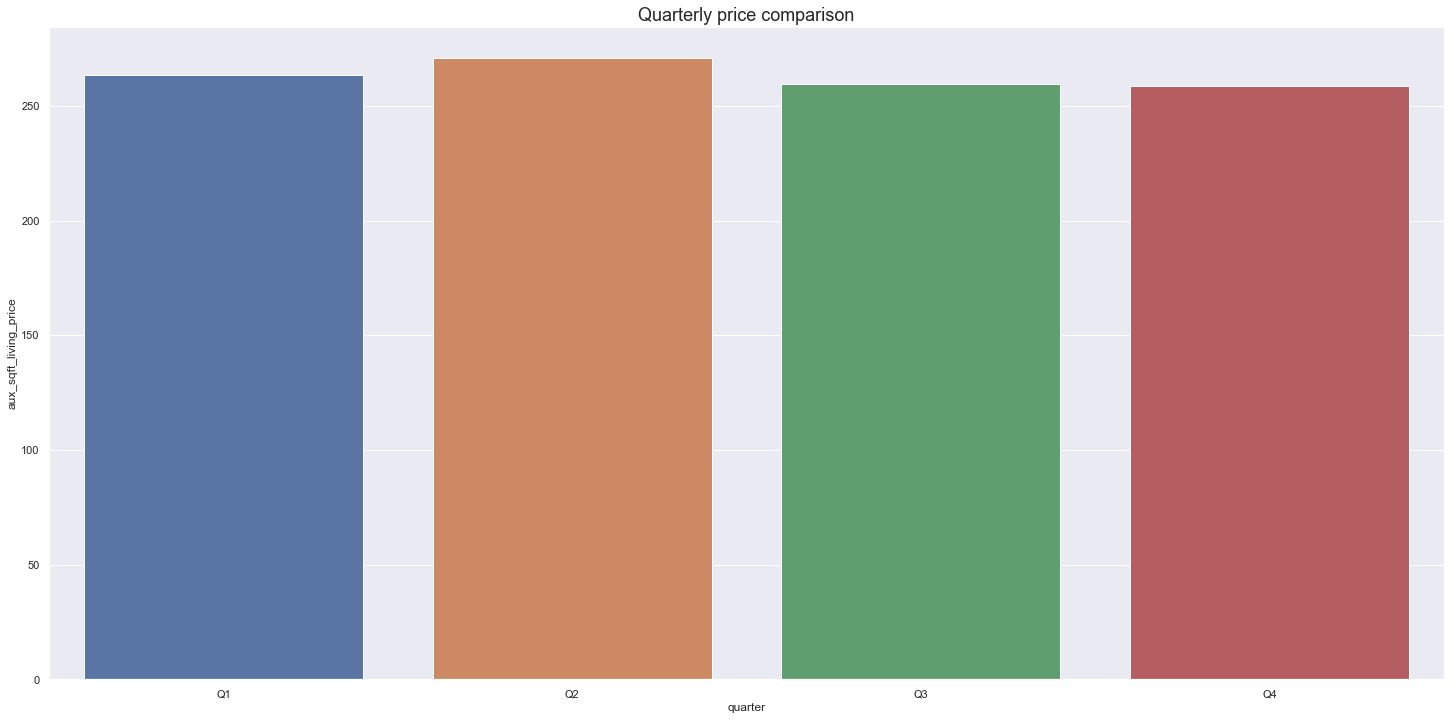

In [33]:
# During certain quarters of the year prices are higher

# Year Season prices
# January, February, and March (Q1)
# April, May, and June (Q2)
# July, August, and September (Q3)
# October, November, and December (Q4)
# needed more data to group by year... just 1y of data.
print(data['date'].min())
print(data['date'].max())


data['month'] = pd.to_datetime(data['date']).dt.month

aux_month_average_sales = data[['month', 'aux_sqft_living_price']].groupby('month').mean().reset_index()
aux_month_average_sales['quarter'] = aux_month_average_sales['month'].apply(lambda x: 'Q1' if (x >= 1) & (x <= 3) else
                                                         'Q2' if (x >=4) & (x <= 6) else
                                                         'Q3' if (x >=7) & (x <= 9) else 
                                                         'Q4' if (x >=10) & (x <= 12) else 'na')

aux_month_average_sales
aux_month_average_sales_quarter = aux_month_average_sales[['aux_sqft_living_price', 'quarter']].groupby('quarter').mean().reset_index()
#sns.barplot( x = 'quarter', y = 'aux_sqft_living_price', data ='aux_month_average_sales_quarter' )
aux_month_average_sales_quarter

print(aux_month_average_sales_quarter)
sns.barplot( x = 'quarter', y = 'aux_sqft_living_price', data =aux_month_average_sales_quarter )
plt.title('Quarterly price comparison', fontsize = 18);

# The dataset comprehends only one year, so it makes it hard to come to a conclusion. Worth mentioning the graph for the specific period the data is available shows no significant difference between quarters.

###  Properties renovated in the last 30 years will sell more expensive.

In [34]:
# BUILDING A TABLE FOR COMPARISON YEAR RENOVATED(minumum 30 y renovated) AND YEAR OF CONNSTRUCTION

data.yr_renovated.unique()

# # Group by year renovated, get only renovations last 30y
data_yc = data[data['yr_renovated'] >= data.yr_renovated.max() - 30 ]

yr_renovated_comparison = data_yc[['yr_built', 'yr_renovated', 'aux_sqft_living_price']].groupby('yr_renovated').median().reset_index()  # (1) group by year renovated, so after we change index to year built
yr_renovated_comparison.rename(columns = {'aux_sqft_living_price':'mean_price_renovated','yr_renovated':'yr_renovated'},inplace = True)
yr_renovated_comparison.set_index(['yr_built'], inplace = True)  # now there´re repeated indexes, since we 1st grouped by year of renovation
# yr_renovated_comparison.drop(data.index[1977], inplace = True)
yr_renovated_comparison.sort_values(by='yr_built', ascending = 'Ascending', inplace = True)  # Checking
yr_renovated_comparison.reset_index(inplace = True)
yr_renovated_comparison = yr_renovated_comparison[['yr_built', 'yr_renovated', 'mean_price_renovated']].groupby('yr_built').mean()  # now getting the MEAN, since it is all median values from the previous groupby (1)
yr_renovated_comparison

# # No renovation
d_aux = data[data['yr_renovated'] == 0]  # Only non renovated
yr_not_renovated_comparison = d_aux[['yr_renovated', 'yr_built', 'aux_sqft_living_price']].groupby('yr_built').median().reset_index()
yr_not_renovated_comparison.rename(columns = {'aux_sqft_living_price':'mean_price_not_renovated','yr_built':'yr_built'}, inplace = True)
yr_not_renovated_comparison.set_index(['yr_built'], inplace = True)
yr_not_renovated_comparison

# # # Renovated
yr_renovated_comparison = yr_renovated_comparison.merge(yr_not_renovated_comparison , how = 'inner', left_on='yr_built', right_on='yr_built')  # inner so years with no properties renovated get dumped
yr_renovated_comparison['difference_pct'] = ((yr_renovated_comparison['mean_price_renovated'] / yr_renovated_comparison['mean_price_not_renovated'])  -1) *100
yr_renovated_comparison.drop(columns = ['yr_renovated_x','yr_renovated_y'], inplace = True)
yr_renovated_comparison.head(6)

,mean_price_renovated,mean_price_not_renovated,difference_pct
yr_built,,,
1930.00000,280.97643,307.66989,-8.67601
1932.00000,280.50000,324.52830,-13.56686
1936.00000,391.07143,323.07692,21.04592
1938.00000,338.98593,296.00000,14.52227
1941.00000,320.41528,336.21950,-4.70057
1942.00000,337.91221,282.84672,19.46832


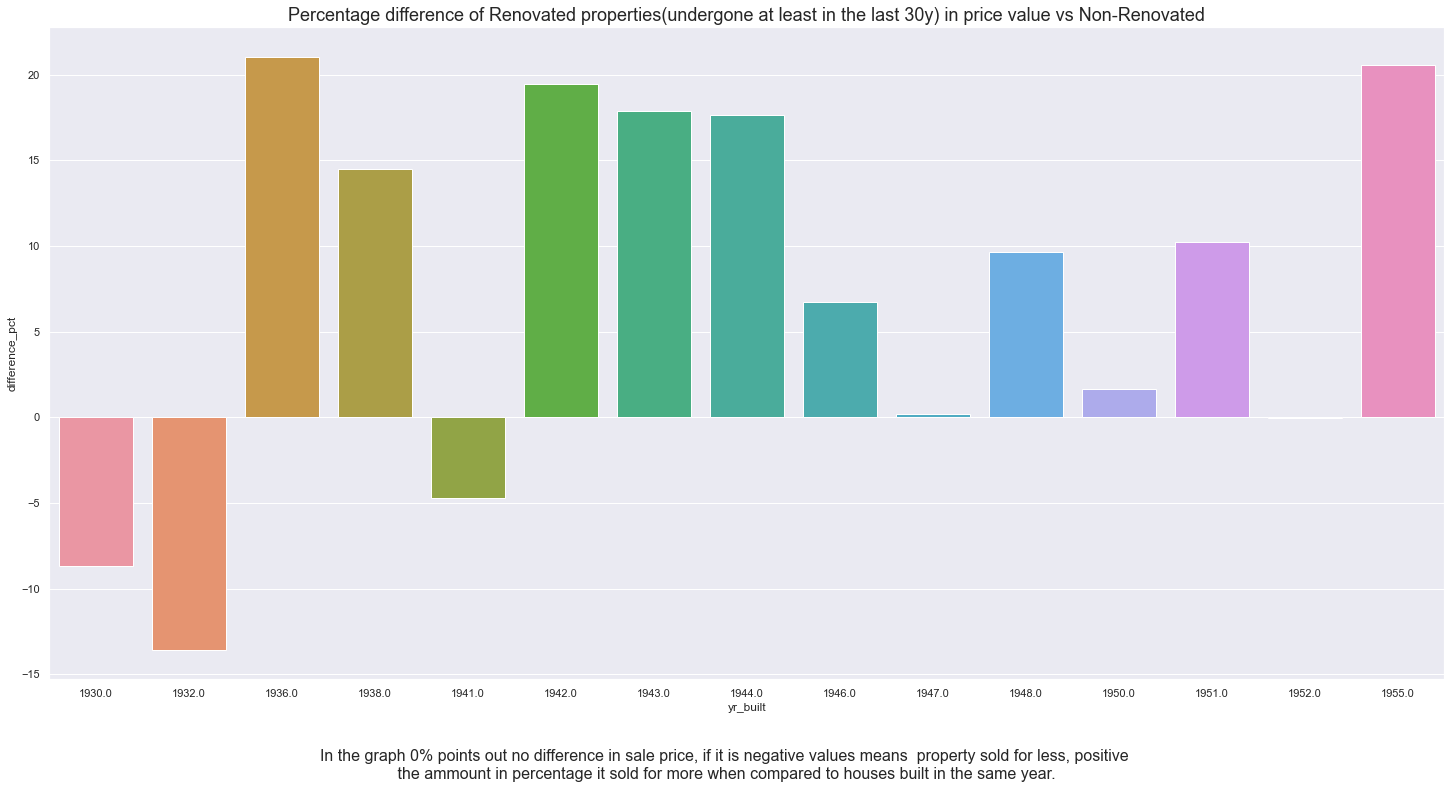

In [35]:
# Renovated properties will sell more expensive
# sns.lineplot(y = 'difference_pct', x = yr_renovated_comparison.index ,data = yr_renovated_comparison)
# plt.axhline(y=0.5, color='r', linestyle='-')
# plt.title('Percentage difference of Renovated properties in price value vs Non-Renovated');
# plt.figtext(0.5, 0.01, "The red line represents 0% difference, if blue line is above it, one can assume that properties built in a specific year sold more expensive, it can be assumed the oposite if blue line is under the red.", ha="center", fontsize=16);

sns.barplot(y = 'difference_pct', x = yr_renovated_comparison.index, data = yr_renovated_comparison, ci = False)
plt.title('Percentage difference of Renovated properties(undergone at least in the last 30y) in price value vs Non-Renovated', fontsize = 18);
plt.figtext(0.5, 0.01, "In the graph 0% points out no difference in sale price, if it is negative values means  property sold for less, positive\n the ammount in percentage it sold for more when compared to houses built in the same year.", ha="center", fontsize=16);


# As seen on the graph, 'recently' renovated properties will sell for more- a question to raise would be what kind of renovation a property has to undergo in order to be considered renovated.  Therefore this assumption can be accepted.

### Old properties, from the beggining of the century will sell better than non renovated ones.

<AxesSubplot:xlabel='binned_yr_built', ylabel='mean_price'>

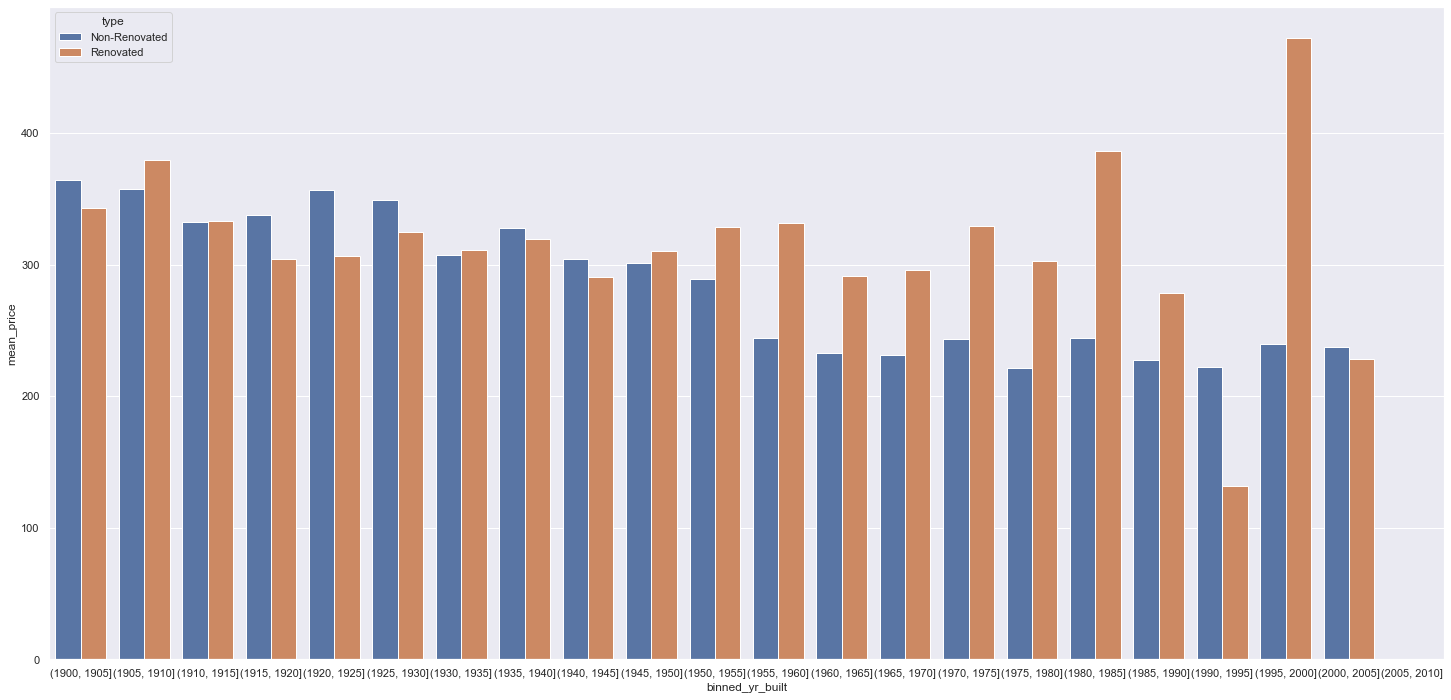

In [36]:
# Old properties, from the beggining of the century, will not have the price much impacted if they had renovation done.

# Selecting all properties more than 10yo
older_prop = data['yr_built'].max() - 10

aux_older_prop = data[data['yr_built'] <= older_prop]



# yr build, yr renovated, sales price



# year by year price built sqft comparison
bins2 = list(range(1900,2015,5))
aux_older_prop['binned_yr_built'] = pd.cut(aux_older_prop['yr_built'], bins=bins2)

data.head(20)

binned_price_aux = aux_older_prop[['aux_sqft_living_price','binned_yr_built']].groupby('binned_yr_built').mean().reset_index()
binned_price_aux.rename(columns = {'aux_sqft_living_price':'aux_sqft_living_price_all'}, inplace = True)

binned_price_aux

# NON RENOVATED
a1_binned_price_aux = aux_older_prop[aux_older_prop['yr_renovated'] == 0]
a1_binned_price_aux = a1_binned_price_aux[['aux_sqft_living_price','binned_yr_built']].groupby('binned_yr_built').mean().reset_index()
a1_binned_price_aux.rename(columns = {'aux_sqft_living_price':'mean_aux_sqft_living_price_non_renovated'}, inplace = True)
a1_binned_price_aux

# RENOVATED - oldest house that has been renovated in the db==> there´re 19 houses(built in 1900), all of them has undergone renovation
a2_binned_price_aux = aux_older_prop[aux_older_prop['yr_renovated'] > 0]
a2_binned_price_aux[a2_binned_price_aux['yr_built']  == 1900 ]

# RENOVATED
# print(a2_binned_price_aux.yr_renovated.min())
a2_binned_price_aux = a2_binned_price_aux[['aux_sqft_living_price','binned_yr_built']].groupby('binned_yr_built').mean().reset_index()
a2_binned_price_aux.rename(columns = {'aux_sqft_living_price':'mean_aux_sqft_living_price_renovated'}, inplace = True)
a2_binned_price_aux.head(4)

# merge
binned_price_aux = binned_price_aux.merge(a1_binned_price_aux, on = 'binned_yr_built', how = 'left')
binned_price_aux = binned_price_aux.merge(a2_binned_price_aux, on = 'binned_yr_built', how = 'left')
binned_price_aux

# Hue
binned_price_aux_hue_not_ren = binned_price_aux[['binned_yr_built','mean_aux_sqft_living_price_non_renovated']]
binned_price_aux_hue_not_ren['type'] = 'Non-Renovated'
binned_price_aux_hue_not_ren.rename(columns = {'mean_aux_sqft_living_price_non_renovated':'mean_price'}, inplace = True)

binned_price_aux_hue_ren = binned_price_aux[['binned_yr_built','mean_aux_sqft_living_price_renovated']]
binned_price_aux_hue_ren['type'] = 'Renovated'
binned_price_aux_hue_ren.rename(columns = {'mean_aux_sqft_living_price_renovated':'mean_price'}, inplace = True)

aux_hue = pd.DataFrame()
aux_hue = aux_hue.append(binned_price_aux_hue_not_ren)
aux_hue = aux_hue.append(binned_price_aux_hue_ren)
aux_hue

sns.barplot(x='binned_yr_built', y='mean_price', hue='type', data=aux_hue)# , ax=ax1)

# Houses built after 1945 all tend to sell higher however houses before that don´t seem to be very influencied by such, so we can reject the hypothesis

### Regions

#### aux - region

In [37]:
data.yr_renovated.unique()


yr_renovated_max = data['yr_renovated'].max() - 20
# data['renovated_last_15y'] = data.apply(lambda x: 1 if ((data['yr_renovated'] - yr_renovated_max) >= 0) else 0, axis = 1)
data['renovated_last_20y'] = data['yr_renovated'].apply(lambda x: 1 if (x-yr_renovated_max) >= 0 else 0)

In [38]:
# aux3 = data[data['renovated_last_15y'] ==1]

In [39]:
# BUILD STATS TABLE ACCORDING TO ZIPCODE
# ======================================

# data['pct_renovated_last_15y'] = 


# getting MEAN data
zipcode_avg_price = data[['zipcode','price','sqft_living','aux_sqft_living_price','condition','grade','yr_built']].groupby('zipcode').mean().reset_index()
zipcode_avg_price.rename(columns = {'price':'mean_price', 'sqft_living':'mean_sqft_living', 
                                    'aux_sqft_living_price':'mean_sqft_living_price',
                                   'condition':'mean_condition','grade':'mean_grade','yr_built':'mean_yr_built'}, inplace = True)


# Getting Median Data:
aux4 = data[['zipcode','price','sqft_living','aux_sqft_living_price','yr_built','sqft_lot']].groupby('zipcode').median().reset_index()
aux4.rename(columns = {'price':'median_price','sqft_living':'median_sqft_living','aux_sqft_living_price':'median_aux_sqft_living_price','yr_built':'median_yr_built','sqft_lot':'median_sqft_lot'}, inplace = True)

# COUNTING transactions
aux2 = data[['zipcode','id']].groupby('zipcode').count().reset_index()
aux2.rename(columns = {'id':'transactions'}, inplace = True)


#aux3 = data[['zipcode','id']].groupby('zipcode').count().reset_index()


# issue
# def add_std(zip):
#     print(data[data['zipcode'] == zip].price.std())
#     # return (data[data['zipcode'] == zip].price.std())

# zipcode_avg_price['std_price'] = zipcode_avg_price['zipcode'].apply(lambda x: x['zipcode'])
# data[data['zipcode'] == 98001].price.std()


# Getting standard deviations:
aux = data[['zipcode','price','sqft_living']].groupby('zipcode').std().reset_index()
aux.rename(columns = {'price':'std_price', 'sqft_living': 'std_sqft_living'}, inplace = True)

# renovations last X years
aux3 = data[data['renovated_last_20y'] == 1].groupby('zipcode').count().reset_index()
aux3.rename(columns = {'renovated_last_20y':'count_renovated_last_20y'}, inplace = True)
aux3 = aux3[['zipcode', 'count_renovated_last_20y']]

# condition
aux5 = data[['zipcode', 'condition']].groupby('zipcode').mean().reset_index()
aux5.rename(columns = {'condition':'mean_condition'}, inplace = True)
aux5 = aux5[['zipcode', 'mean_condition']]


zipcode_avg_price = zipcode_avg_price.merge(aux, on = 'zipcode', how = 'left')
zipcode_avg_price = zipcode_avg_price.merge(aux2, on = 'zipcode', how = 'left')
zipcode_avg_price = zipcode_avg_price.merge(aux3, on = 'zipcode', how = 'left')
zipcode_avg_price = zipcode_avg_price.merge(aux4, on = 'zipcode', how = 'left')
zipcode_avg_price = zipcode_avg_price.merge(aux5, on = 'zipcode', how = 'left')

# zipcode_avg_price['renovation_pct'] = zipcode_avg_price.apply(lambda x: (x['count_renovated_last_20y'] / x['transactions']))
zipcode_avg_price['renovation_pct'] = zipcode_avg_price['count_renovated_last_20y'] / zipcode_avg_price['transactions' ]* 100
zipcode_avg_price  # FINAL TABLE



,zipcode,mean_price,mean_sqft_living,mean_sqft_living_price,mean_condition_x,mean_grade,mean_yr_built,std_price,std_sqft_living,transactions,count_renovated_last_20y,median_price,median_sqft_living,median_aux_sqft_living_price,median_yr_built,median_sqft_lot,mean_condition_y,renovation_pct
0,98001,280804.69061,1900.85635,151.38794,3.33702,7.29558,1980.67956,98979.23009,655.26044,362,2.00000,260000.00000,1822.00000,147.27571,1981.00000,9287.00000,3.33702,0.55249
1,98002,234284.03518,1627.74372,151.17409,3.74372,6.69347,1967.77387,52041.44866,538.97254,199,1.00000,235000.00000,1570.00000,147.17742,1966.00000,7282.00000,3.74372,0.50251
2,98003,294111.27857,1928.88214,157.11341,3.37143,7.54286,1976.88571,107597.66224,736.66519,280,1.00000,267475.00000,1780.00000,154.81925,1975.00000,8816.00000,3.37143,0.35714
3,98004,1355927.08202,2909.02208,475.43561,3.49527,8.68770,1971.47003,745820.08941,1308.36863,317,24.00000,1150000.00000,2660.00000,456.94444,1965.00000,11119.00000,3.49527,7.57098
4,98005,810164.87500,2656.80357,314.92923,3.69643,8.48810,1969.74405,268753.72025,908.31980,168,2.00000,765475.00000,2505.00000,316.21385,1967.00000,12220.00000,3.69643,1.19048
5,98006,859684.77912,2888.29518,299.09148,3.65863,8.79518,1978.72088,445911.56914,1170.73052,498,14.00000,760184.50000,2720.00000,288.23292,1978.00000,10447.50000,3.65863,2.81124
6,98007,617105.08511,2182.05674,290.04902,3.63121,7.96454,1971.07092,199940.18481,733.76185,141,4.00000,555000.00000,2090.00000,289.58621,1965.00000,9000.00000,3.63121,2.83688
7,98008,645507.37809,2133.44523,301.71773,3.66784,7.65371,1966.32509,421589.95460,855.14207,283,5.00000,545000.00000,1980.00000,291.93548,1964.00000,8713.00000,3.66784,1.76678
8,98010,423665.99000,2137.59000,210.09536,3.53000,7.40000,1979.18000,195414.98276,955.46879,100,4.00000,359999.50000,1902.00000,194.21119,1988.50000,19727.00000,3.53000,4.00000
9,98011,490351.46667,2253.09744,225.98724,3.22051,7.77436,1982.14872,121846.65822,712.61315,195,2.00000,470000.00000,2200.00000,221.10429,1983.00000,8947.00000,3.22051,1.02564


#### Regions where the renovation rate is higher tend to have a higher price.

Text(0.5, 1.0, 'Pearson Correlation Coefficient')

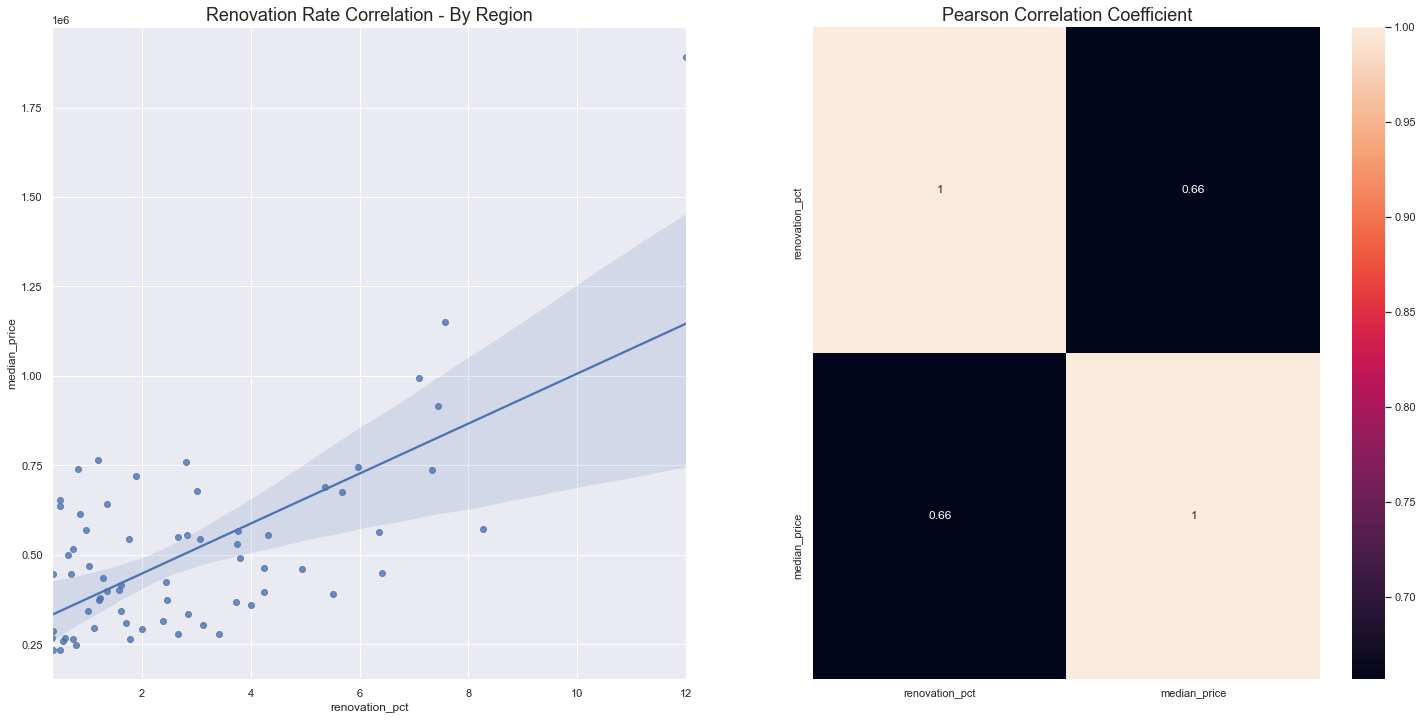

In [40]:
# Regions where the renovation rate is higher tend to have a higher price.
# zipcode_avg_price[['zipcode','renovation_pct','median_price']]
plt.subplot(1,2,1)
sns.regplot(x = 'renovation_pct', y = 'median_price', data =zipcode_avg_price )
plt.title('Renovation Rate Correlation - By Region', fontsize = 18)
plt.subplot(1,2,2)
aux_corr = zipcode_avg_price[['renovation_pct','median_price']]
sns.heatmap(aux_corr.corr(method = 'pearson'), annot = True)
plt.title('Pearson Correlation Coefficient', fontsize = 18)
# Calculating the median price for each specific zipcode and comparing the renovation-rate(which takes in account the percentage of properties transactioned in the period that had been renovated) it is safe to assume that a neighbourhood that has higher renovation rates will have higher prices. The correlation result of 0.66 clearly shows that. Hypothesis accepted.

## Multivariate

Checking the multivariate analysis there are a few interesting correlations noticed, prices strongly correlates to areas of the construction (sqft_living,  sqft_above, sqft_basement), as well to the construction area of the surrounding properties(sqf_living15), which makes sense.

Waterfront properties tend to have a high view rating, as well as the number of bedrooms, bathrooms, floors and grade have all strongly relates to each other.

### Numerical Attributes

Text(0.5, 1.0, 'Numerical Attributes')

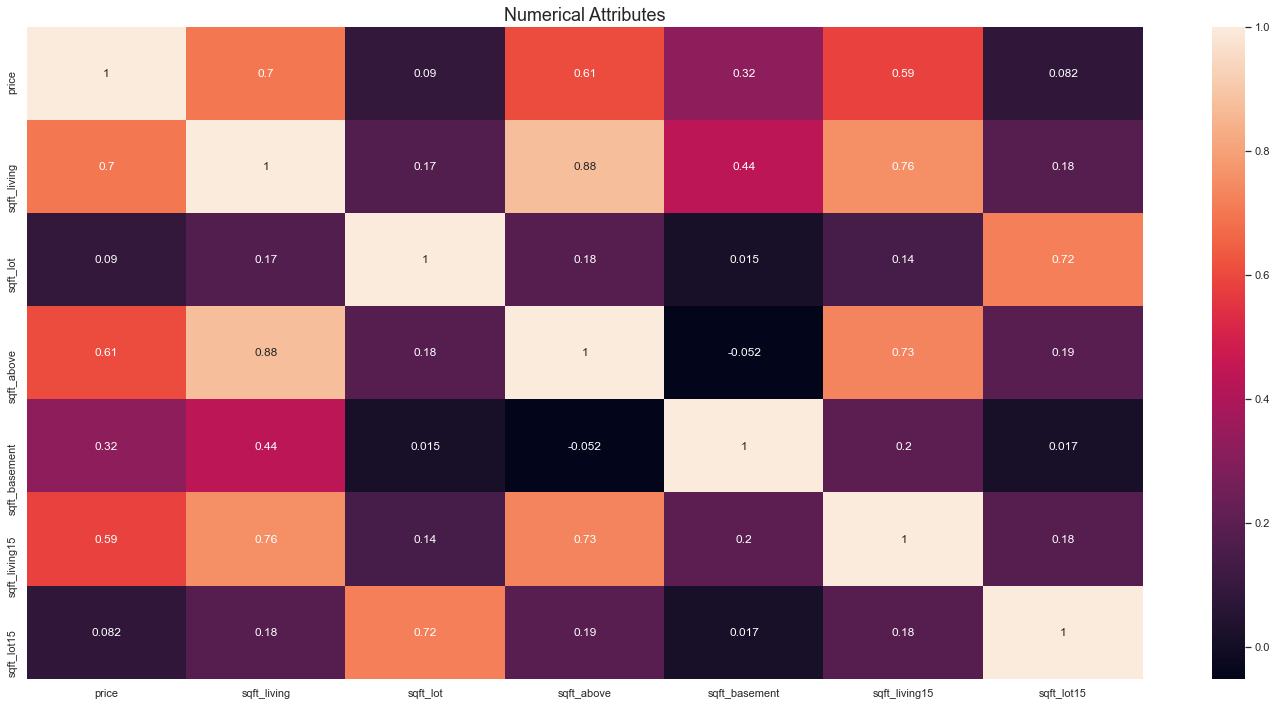

In [41]:
correlation = num_attributes.corr(method = 'pearson')
sns.heatmap(correlation, annot = True)
plt.title('Numerical Attributes', fontsize = 18)

### Categorical Attributes

In [42]:
at = cramer_v(cat_attributes['bedrooms'], cat_attributes['bedrooms'])
at

1.0002777263594653

Text(0.5, 1.0, 'Categorical Attributes')

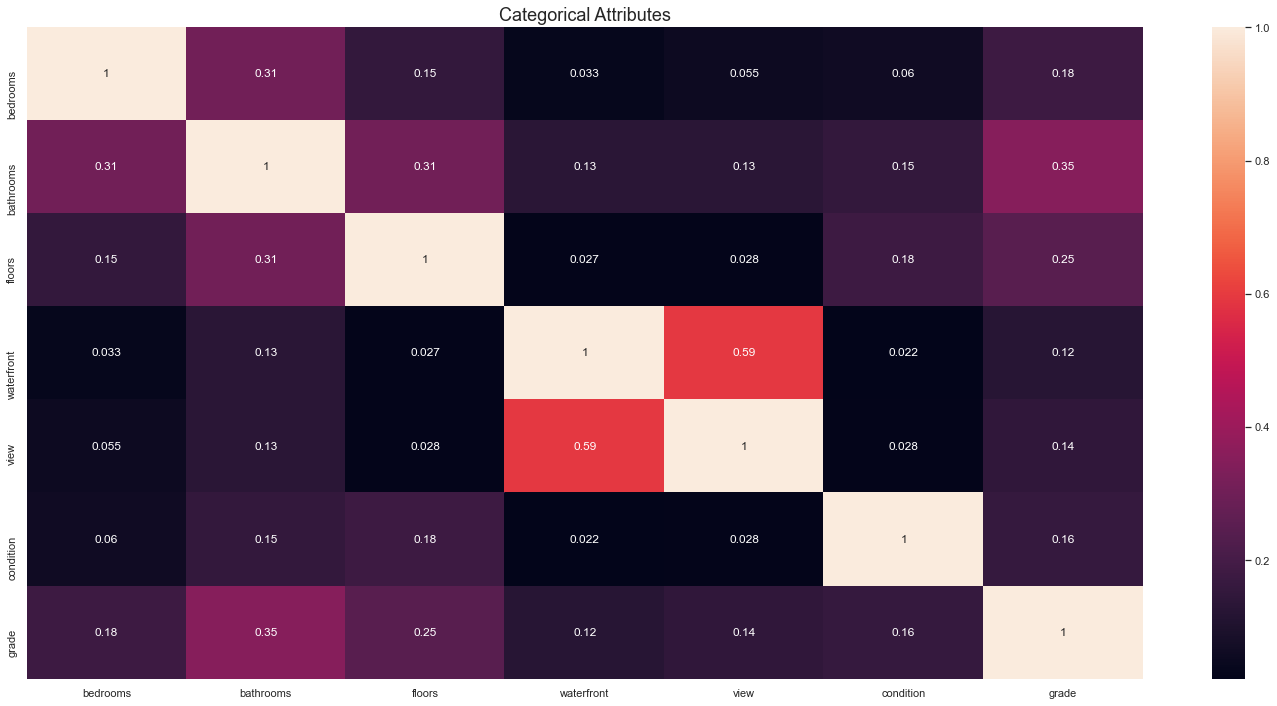

In [43]:
list_to_cramer = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade']

cramer_df = pd.DataFrame()

for item in list_to_cramer:
    data_list = []
    for subitem in list_to_cramer:
        at = cramer_v(cat_attributes[item], cat_attributes[subitem])
        data_list.append(at)
    cramer_df_temp = pd.DataFrame()
    cramer_df_temp = cramer_df_temp.assign(item=data_list)
    cramer_df_temp.rename(columns = {'item':item} , inplace = True)
#     print(cramer_df_temp)
    cramer_df = pd.concat([cramer_df, cramer_df_temp], axis = 1, ignore_index = False)
cramer_df

# cramer_df_temp

cramer_df = cramer_df.set_index(cramer_df.columns)
sns.heatmap(cramer_df, annot = True)
plt.title('Categorical Attributes', fontsize = 18)


# Region Aspects

By using the data provided on section 4.2.7.1:
    - Rank zipcodes, 1st by transactions, second by price, renovation rate and overall condition.
    - Check number of properties under median price, sqft_price. - 10%? 20%?  (keep in mind condition)
    - suggest to sell on, or above median sqft price. // potential gain on median, or median+something?
    
    
    

## Ranking zipcodes by top 15 in transactionsm

In [44]:
# Getting top 15 transaction zipcodes
zipcode_avg_price.sort_values(by='transactions', ascending = False, inplace = True)
zipcode_top15_transaction = zipcode_avg_price.head(15)

## Ranking the top 10 in price

In [45]:
# Ranking the 
zipcode_top10_median_price = zipcode_top15_transaction.sort_values(by = 'median_price').head(10)

## Ranking the top 5 in terms of condition

In [46]:
zipcode_top5_mean_condition = zipcode_top10_median_price.sort_values(by='mean_condition_x', ascending = False).head(5)

In [47]:
zipcode_top5_mean_condition

,zipcode,mean_price,mean_sqft_living,mean_sqft_living_price,mean_condition_x,mean_grade,mean_yr_built,std_price,std_sqft_living,transactions,count_renovated_last_20y,median_price,median_sqft_living,median_aux_sqft_living_price,median_yr_built,median_sqft_lot,mean_condition_y,renovation_pct
57,98133,386997.39676,1614.46964,253.98063,3.54049,7.12551,1963.34615,100866.37697,550.00882,494,6.00000,375000.00000,1509.50000,245.21257,1956.00000,7305.50000,3.54049,1.21457
51,98117,576795.00723,1692.03978,363.53553,3.53888,7.28210,1948.27125,188324.05159,684.23613,553,17.00000,544000.00000,1550.00000,344.20290,1941.00000,4501.00000,3.53888,3.07414
26,98042,311632.10584,1982.25912,164.34845,3.51825,7.42518,1986.38139,106023.00831,746.24267,548,11.00000,292000.00000,1915.00000,159.24475,1988.00000,8250.00000,3.51825,2.00730
62,98155,423725.69507,1786.61435,246.51903,3.47309,7.17040,1961.13677,268209.31701,763.81301,446,11.00000,375000.00000,1660.00000,234.94966,1955.00000,8532.50000,3.47309,2.46637
32,98058,353608.63516,2049.63077,178.20436,3.46593,7.56264,1978.46154,128670.69240,754.85377,455,13.00000,335000.00000,1970.00000,173.07692,1978.00000,8400.00000,3.46593,2.85714


## Best region considered by rank

In [48]:
# Zipcode 98133 by criteria elimination would be the most indicated region

# Counting the top5 number of properties under the 
list_chosen = list(zipcode_top5_mean_condition['zipcode'])
data_top5 = data.loc[data['zipcode'].isin(list_chosen)]

# Number of transaction with the top5 regions:
print('Number of transaction with the top5 regions: ' + str(data_top5.shape[0]) )
# Region winners
print('Top Regions' + str(list_chosen) )

Number of transaction with the top5 regions: 2496
Top Regions[98133, 98117, 98042, 98155, 98058]


In [49]:
# Region 1st place
data_chosen1 = data_top5.loc[data_top5['zipcode'] == 98133]

In [50]:
data_chosen1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,aux_sqft_living_price,living_and_lot,month,renovated_last_20y
count,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000,494.00000
mean,4658195186.83198,386997.39676,3.13158,1.73178,1614.46964,7082.22672,1.40081,0.00000,0.02024,3.54049,7.12551,1361.97166,252.49798,1963.34615,68.38462,98133.00000,47.73561,-122.34382,1554.90081,6719.71862,253.98063,8696.69636,6.53239,0.01215
std,2657806824.59204,100866.37697,0.93441,0.66853,550.00882,3485.18533,0.63715,0.00000,0.20039,0.68406,0.63728,448.65991,374.86359,25.60108,362.62438,0.00000,0.02228,0.00839,335.57398,2725.36621,65.54015,3696.27940,3.16003,0.10965
min,127100005.00000,130000.00000,0.00000,0.00000,590.00000,834.00000,1.00000,0.00000,0.00000,3.00000,5.00000,590.00000,0.00000,1900.00000,0.00000,98133.00000,47.70130,-122.35800,830.00000,659.00000,102.88809,1828.00000,1.00000,0.00000
25%,2252100071.00000,318000.00000,3.00000,1.00000,1212.50000,5250.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1080.00000,0.00000,1948.00000,0.00000,98133.00000,47.71650,-122.35200,1330.00000,5250.00000,210.89892,6736.25000,4.00000,0.00000
50%,5469000120.00000,375000.00000,3.00000,1.75000,1509.50000,7305.50000,1.00000,0.00000,0.00000,3.00000,7.00000,1285.00000,0.00000,1956.00000,0.00000,98133.00000,47.73305,-122.34300,1504.50000,7556.50000,245.21257,8945.00000,6.00000,0.00000
75%,6441500541.25000,435000.00000,4.00000,2.25000,1957.50000,8625.00000,2.00000,0.00000,0.00000,4.00000,7.00000,1510.00000,500.00000,1979.00000,0.00000,98133.00000,47.75422,-122.33700,1800.00000,8218.50000,286.20651,10500.50000,9.00000,0.00000
max,9561100080.00000,808100.00000,8.00000,3.75000,3400.00000,29347.00000,3.00000,0.00000,2.00000,5.00000,9.00000,3320.00000,1700.00000,2015.00000,2015.00000,98133.00000,47.77760,-122.31500,2730.00000,18110.00000,576.42857,31297.00000,12.00000,1.00000


In [51]:
data_chosen1.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,aux_sqft_living_price,binned_price,binned_sqft_living,living_and_lot,binned_living_and_lot,month,renovated_last_20y
20,6300500875,2014-05-14,385000.00000,4,1.75000,1620,4980,1.00000,0,0,4,7,860,760,1947,0,98133,47.70250,-122.34100,1400,4980,237.65432,"(300000, 400000]","(1600, 1800]",6600,"(1400, 21400]",5,0
31,2426039314,2014-12-01,280000.00000,2,1.50000,1190,1265,3.00000,0,0,3,7,1190,0,2005,0,98133,47.72740,-122.35700,1390,1756,235.29412,"(200000, 300000]","(1000, 1200]",2455,"(1400, 21400]",12,0


## Potential deals

In [52]:
#selecting properties at least 20% lower than the median price:
data_chosen1_lower = data_chosen1[data_chosen1['aux_sqft_living_price'] <= (data_chosen1.aux_sqft_living_price.median() * 0.8)]

In [53]:
data_chosen1_lower.sort_values(by = 'condition', ascending = False, inplace = True)

In [54]:
# Selecting the properties condition 5 and 4:
data_chosen1_lower_selected = data_chosen1[(data_chosen1['condition'] == 5) | (data_chosen1['condition'] == 4)]


data_chosen1_lower_selected

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,aux_sqft_living_price,binned_price,binned_sqft_living,living_and_lot,binned_living_and_lot,month,renovated_last_20y
20,6300500875,2014-05-14,385000.00000,4,1.75000,1620,4980,1.00000,0,0,4,7,860,760,1947,0,98133,47.70250,-122.34100,1400,4980,237.65432,"(300000, 400000]","(1600, 1800]",6600,"(1400, 21400]",5,0
78,6300000287,2014-06-09,410000.00000,3,1.00000,1410,5060,1.00000,0,0,4,7,910,500,1956,0,98133,47.70730,-122.34000,1130,5693,290.78014,"(400000, 500000]","(1400, 1600]",6470,"(1400, 21400]",6,0
143,6140100875,2015-04-15,420000.00000,3,1.00000,1060,8097,1.00000,0,0,4,7,940,120,1923,0,98133,47.71440,-122.35100,1560,7940,396.22642,"(400000, 500000]","(1000, 1200]",9157,"(1400, 21400]",4,0
169,1755700060,2014-06-11,371500.00000,3,2.00000,1370,8336,1.00000,0,0,5,7,1370,0,1964,0,98133,47.74580,-122.33100,1770,7288,271.16788,"(300000, 400000]","(1200, 1400]",9706,"(1400, 21400]",6,0
193,3663500060,2014-06-25,400000.00000,3,2.50000,2180,7508,1.00000,0,0,4,7,1420,760,1962,0,98133,47.76060,-122.33600,1900,7818,183.48624,"(300000, 400000]","(2000, 2200]",9688,"(1400, 21400]",6,0
271,6378500125,2015-05-01,436000.00000,2,1.00000,1040,7538,1.00000,0,0,4,7,1040,0,1939,0,98133,47.71070,-122.35200,1440,7530,419.23077,"(400000, 500000]","(1000, 1200]",8578,"(1400, 21400]",5,0
316,7771300125,2015-04-08,487000.00000,3,2.00000,2590,14052,1.00000,0,0,5,8,1720,870,1948,0,98133,47.73570,-122.33300,1570,8162,188.03089,"(400000, 500000]","(2400, 2600]",16642,"(1400, 21400]",4,0
371,2231500030,2014-10-01,315000.00000,4,2.25000,2180,10754,1.00000,0,0,5,7,1100,1080,1954,0,98133,47.77110,-122.34100,1810,6929,144.49541,"(300000, 400000]","(2000, 2200]",12934,"(1400, 21400]",10,0
372,2231500030,2015-03-24,530000.00000,4,2.25000,2180,10754,1.00000,0,0,5,7,1100,1080,1954,0,98133,47.77110,-122.34100,1810,6929,243.11927,"(500000, 600000]","(2000, 2200]",12934,"(1400, 21400]",3,0
417,2697100140,2015-01-05,423000.00000,4,2.25000,2200,9351,1.00000,0,0,5,7,1290,910,1962,0,98133,47.74480,-122.33300,1910,8660,192.27273,"(400000, 500000]","(2000, 2200]",11551,"(1400, 21400]",1,0


In [55]:
cost_of_aquisition = data_chosen1_lower_selected.price.sum()
# considering that all the target properties are at least 20% the mean price, and we have chosen properties with condition 4 and 5, if investors are able to sell at least 10% above the square feet median price, that would represent a potential sale value of
potential_gain = cost_of_aquisition* 1.3
print('Cost of Aquisition: {}\nPotential Gain: {}\nNumber of properties selected: {}'.format(cost_of_aquisition, potential_gain, data_chosen1_lower_selected.id.count()))

Cost of Aquisition: 84149567.0
Potential Gain: 109394437.10000001
Number of properties selected: 213


## Top 5 Regions summary - ZIPCODE, Mean Price Neighbourhood, Mean Price per sqft, transactions in the period

In [56]:


df_neighbours_potential = zipcode_top10_median_price[['zipcode','median_price', 'median_aux_sqft_living_price','transactions']].reset_index()

df_neighbours_potential

,index,zipcode,median_price,median_aux_sqft_living_price,transactions
0,13,98023,268450.00000,144.97041,499
1,26,98042,292000.00000,159.24475,548
2,32,98058,335000.00000,173.07692,455
3,23,98038,342000.00000,170.91270,590
4,52,98118,367500.00000,241.73922,508
5,57,98133,375000.00000,245.21257,494
6,62,98155,375000.00000,234.94966,446
7,33,98059,435000.00000,196.77695,468
8,22,98034,445950.00000,255.97270,545
9,51,98117,544000.00000,344.20290,553


Text(0.5, 1.0, 'Transactions Zip Code')

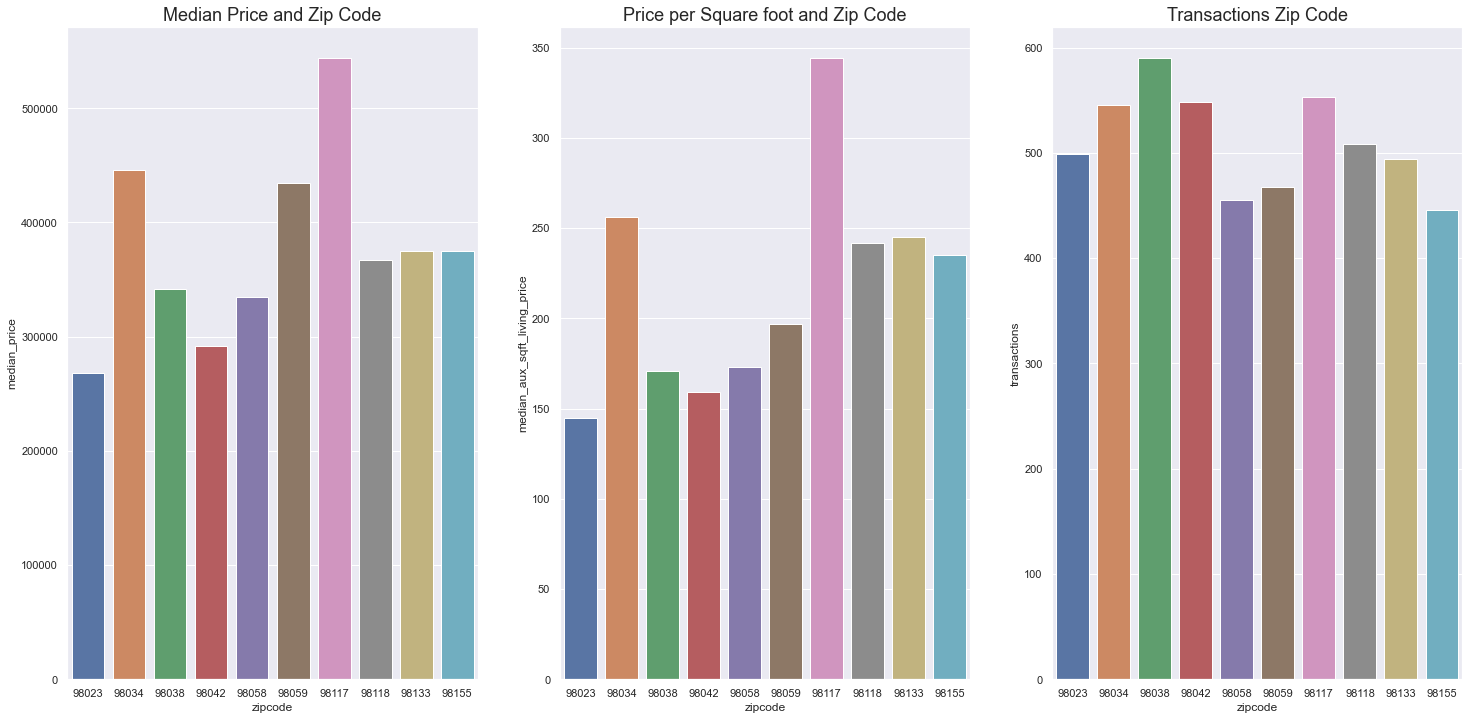

In [57]:
plt.subplot(1,3,1)
sns.barplot(y = 'median_price', x=  'zipcode', data =  df_neighbours_potential)
plt.title('Median Price and Zip Code', fontsize = 18)
plt.subplot(1,3,2)
sns.barplot(y = 'median_aux_sqft_living_price', x=  'zipcode', data =  df_neighbours_potential)
plt.title('Price per Square foot and Zip Code', fontsize = 18)
plt.subplot(1,3,3)
sns.barplot(y = 'transactions', x=  'zipcode', data =  df_neighbours_potential)
plt.title('Transactions Zip Code', fontsize = 18)